# Libraries

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [2]:
from google.colab import files
uploaded = files.upload()

Saving exams.csv to exams.csv


# General

In [27]:
filename = 'exams.csv'
columns = ['gender', 'race/ethnicity', 'parental level of educ', 'lunch',
       'test prep crs', 'math score', 'reading score',
       'writing score']
data = read_csv(filename,
                )

peek = data.head(10)
print(peek)

shape = data.shape
print("shape", shape)


types = data.dtypes
print("types", types)

description = data.describe()
print("description", description)

   gender race/ethnicity parental level of education         lunch  \
0  female        group D                some college      standard   
1    male        group D          associate's degree      standard   
2  female        group D                some college  free/reduced   
3    male        group B                some college  free/reduced   
4  female        group D          associate's degree      standard   
5    male        group C            some high school      standard   
6  female        group E          associate's degree      standard   
7  female        group B            some high school      standard   
8    male        group C            some high school      standard   
9  female        group C           bachelor's degree      standard   

  test preparation course  math score  reading score  writing score  
0               completed          59             70             78  
1                    none          96             93             87  
2                  

## Data Cleaning

In [28]:
data.head(20)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86
5,male,group C,some high school,standard,none,68,57,54
6,female,group E,associate's degree,standard,none,82,83,80
7,female,group B,some high school,standard,none,46,61,58
8,male,group C,some high school,standard,none,80,75,73
9,female,group C,bachelor's degree,standard,completed,57,69,77


In [29]:
print("\nMissing values in each column:\n", data.isnull().sum())


Missing values in each column:
 gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [30]:
le = LabelEncoder()
data['gender'] = le.fit_transform(data['gender'])
data['race/ethnicity'] = le.fit_transform(data['race/ethnicity'])
data['test preparation course'] = le.fit_transform(data['test preparation course'])
le_education = LabelEncoder()
data['parental level of education'] = le_education.fit_transform(data['parental level of education'])

le_lunch = LabelEncoder()
data['lunch'] = le_lunch.fit_transform(data['lunch'])

data.head(20)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,3,4,1,0,59,70,78
1,1,3,0,1,1,96,93,87
2,0,3,4,0,1,57,76,77
3,1,1,4,0,1,70,70,63
4,0,3,0,1,1,83,85,86
5,1,2,5,1,1,68,57,54
6,0,4,0,1,1,82,83,80
7,0,1,5,1,1,46,61,58
8,1,2,5,1,1,80,75,73
9,0,2,1,1,0,57,69,77


In [31]:
# Normalize scores
scaler = MinMaxScaler()
data[['math score', 'reading score', 'writing score']] = scaler.fit_transform(data[['math score', 'reading score', 'writing score']])
data.head(20)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,3,4,1,0,0.517647,0.600000,0.741176
1,1,3,0,1,1,0.952941,0.906667,0.847059
2,0,3,4,0,1,0.494118,0.680000,0.729412
3,1,1,4,0,1,0.647059,0.600000,0.564706
4,0,3,0,1,1,0.800000,0.800000,0.835294
5,1,2,5,1,1,0.623529,0.426667,0.458824
6,0,4,0,1,1,0.788235,0.773333,0.764706
7,0,1,5,1,1,0.364706,0.480000,0.505882
8,1,2,5,1,1,0.764706,0.666667,0.682353
9,0,2,1,1,0,0.494118,0.586667,0.729412


### NOW DATA CLEANED

Gender
*   0 = female
*   1 = male


Race/ethnicity
*   0 - group A
*   1 - group B
*   2 - group C
*   3 - group D
*   4 - group E


Parental level of education
*   0 = associate's degree
*   1 = bachelor's degree
*   2 = high school
*   3 = master's degree
*   4 = some college


Lunch
*   0 = standart
*   1 = free/reduced


Test preparation course
*   0 = none
*   1 = completed

# Graphs

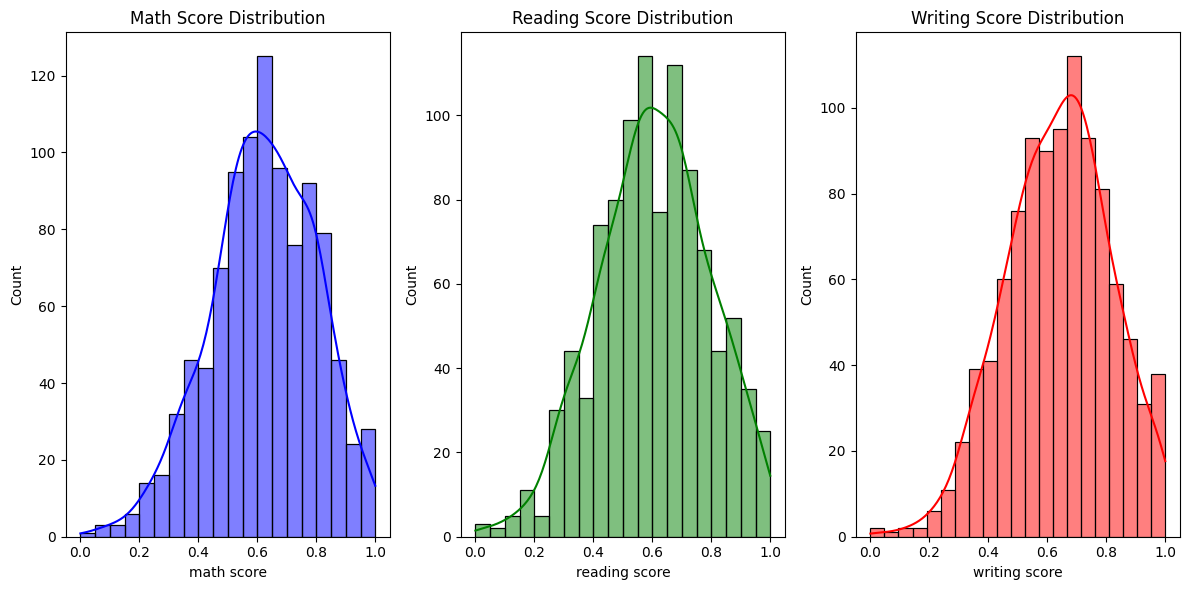

In [34]:
# Plot the distribution of the scores
plt.figure(figsize=(12, 6))

# Math Score
plt.subplot(1, 3, 1)
sns.histplot(data['math score'], kde=True, color='blue')
plt.title('Math Score Distribution')

# Reading Score
plt.subplot(1, 3, 2)
sns.histplot(data['reading score'], kde=True, color='green')
plt.title('Reading Score Distribution')

# Writing Score
plt.subplot(1, 3, 3)
sns.histplot(data['writing score'], kde=True, color='red')
plt.title('Writing Score Distribution')

plt.tight_layout()
plt.show()

<ipython-input-37-c84caf67a947>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y='total score', data=data, palette='Set2')


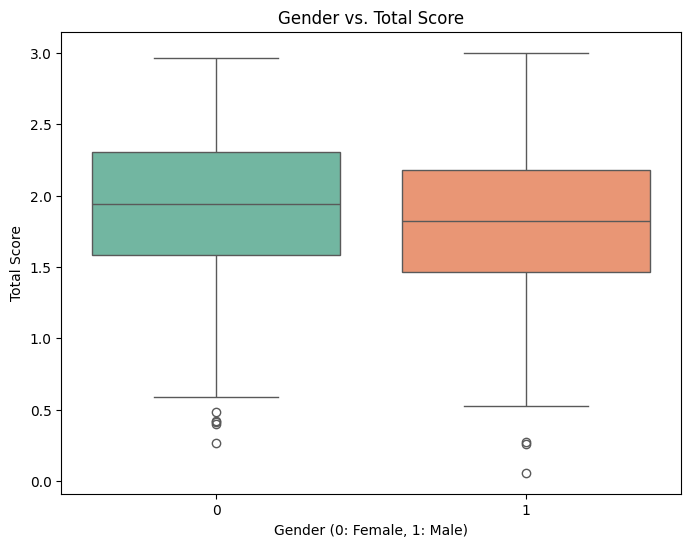

In [37]:
# Gender vs. Total Score
plt.figure(figsize=(8, 6))
sns.boxplot(x='gender', y='total score', data=data, palette='Set2')
plt.title('Gender vs. Total Score')
plt.xlabel('Gender (0: Female, 1: Male)')
plt.ylabel('Total Score')
plt.show()

<ipython-input-38-3e4f7ca35983>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='parental level of education', y='total score', data=data, palette='Blues_d')


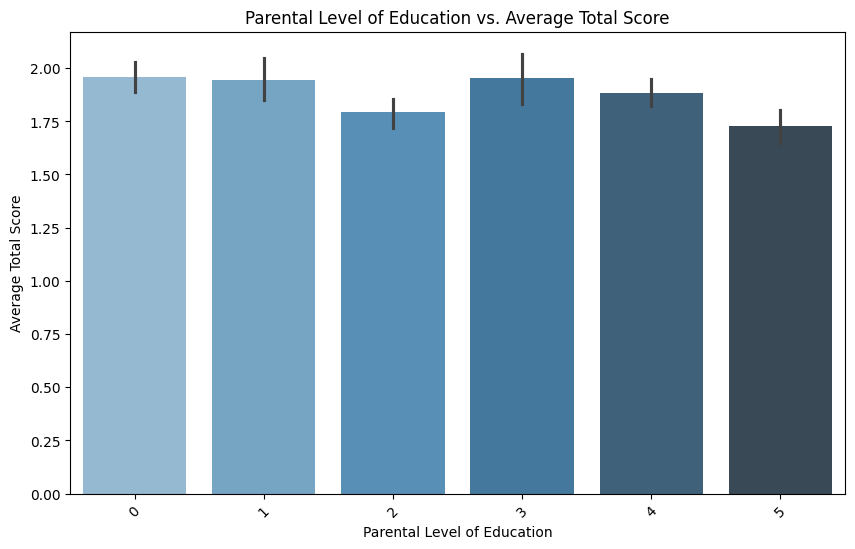

In [38]:
# Parental Level of Education vs. Average Total Score
plt.figure(figsize=(10, 6))
sns.barplot(x='parental level of education', y='total score', data=data, palette='Blues_d')
plt.title('Parental Level of Education vs. Average Total Score')
plt.xlabel('Parental Level of Education')
plt.ylabel('Average Total Score')
plt.xticks(rotation=45)
plt.show()


<ipython-input-39-be49cf20d41d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='lunch', y='total score', data=data, palette='Pastel1')


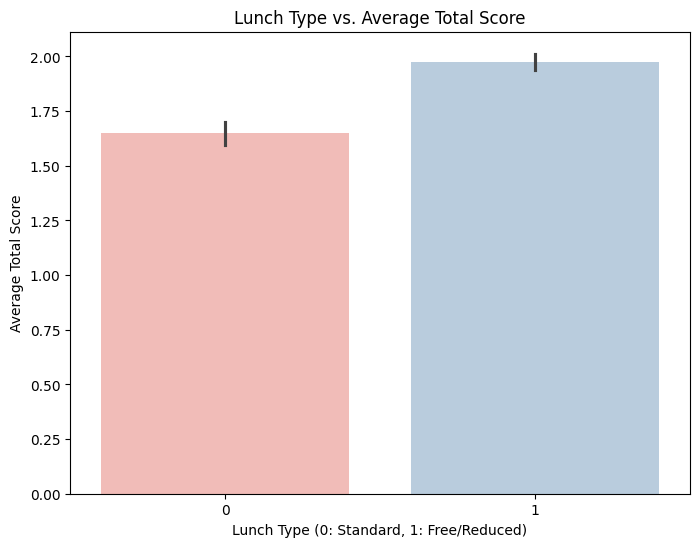

In [39]:
# Lunch Type vs. Average Total Score
plt.figure(figsize=(8, 6))
sns.barplot(x='lunch', y='total score', data=data, palette='Pastel1')
plt.title('Lunch Type vs. Average Total Score')
plt.xlabel('Lunch Type (0: Standard, 1: Free/Reduced)')
plt.ylabel('Average Total Score')
plt.show()


# Model

In [ ]:
X = data.drop(columns=['math score', 'reading score', 'writing score'])  # Features
y = data[['math score']]  # Target (predicting math score)

# 📌 Step 8: Train-Test Split (80-20 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 📌 Step 9: Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
#each columns has different scales for exmple age 20 and score is 87 it will convert everything into one so that easy for model to learn

# 📌 Step 10: Train & Evaluate ML Models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100),
    "SVM": SVR(kernel='rbf')
}

for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # The trained model predicts values for X_test (test data)

    # Evaluate Model
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"\n📌 {name} Performance:")
    print(f"Mean Absolute Error: {mae:.2f}")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R² Score: {r2:.2f}")


📌 Linear Regression Performance:
Mean Absolute Error: 9.90
Mean Squared Error: 156.27
R² Score: 0.29

📌 Decision Tree Performance:
Mean Absolute Error: 10.79
Mean Squared Error: 179.35
R² Score: 0.19

📌 Random Forest Performance:
Mean Absolute Error: 10.45
Mean Squared Error: 167.02
R² Score: 0.24


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



📌 SVM Performance:
Mean Absolute Error: 10.10
Mean Squared Error: 163.87
R² Score: 0.26
